In [23]:
# Section 0: Setup - Import libraries

import numpy as np              # For numerical operations and arrays
import pandas as pd             # For working with tabular data
import matplotlib.pyplot as plt # For plotting graphs

from sklearn.datasets import fetch_california_housing   # Real world regression dataset
from sklearn.model_selection import train_test_split    # Train test split utility
from sklearn.linear_model import LinearRegression       # Multiple Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import PolynomialFeatures    # For generating polynomial features
from sklearn.pipeline import Pipeline                   # For chaining preprocessing and model

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True


In [24]:
# Load the California Housing dataset

from sklearn.datasets import fetch_openml

data = fetch_openml(name="california_housing", version=1, as_frame=True)
X = data.data
y = data.target

# `california.frame` is a pandas DataFrame that already includes
# both the features and the target column

display(X.head(5))
display(y.head(5))
X.shape, y.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


((20640, 9), (20640,))

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(4), int64(4)
memory usage: 1.3 MB


In [26]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype
--------------  -----
20640 non-null  int64
dtypes: int64(1)
memory usage: 161.4 KB


In [27]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001


In [28]:
# Define target and feature columns

target_col ='median_house_value'

feature_cols = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']

x = X[feature_cols]  # selected features are now in x.
x.head(5)


,median_income,housing_median_age,total_rooms,total_bedrooms,population,households
0,8.3252,41,880,129.0,322,126
1,8.3014,21,7099,1106.0,2401,1138
2,7.2574,52,1467,190.0,496,177
3,5.6431,52,1274,235.0,558,219
4,3.8462,52,1627,280.0,565,259


In [29]:
x.shape, y.shape

((20640, 6), (20640,))

Correlation matrix: 


,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
median_income,1.000000,-0.119034,0.198050,-0.007723,0.004834,0.013033,0.688075
housing_median_age,-0.119034,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,0.105623
total_rooms,0.198050,-0.361262,1.000000,0.930380,0.857126,0.918484,0.134153
total_bedrooms,-0.007723,-0.320451,0.930380,1.000000,0.877747,0.979728,0.049686
population,0.004834,-0.296244,0.857126,0.877747,1.000000,0.907222,-0.024650
households,0.013033,-0.302916,0.918484,0.979728,0.907222,1.000000,0.065843
median_house_value,0.688075,0.105623,0.134153,0.049686,-0.024650,0.065843,1.000000


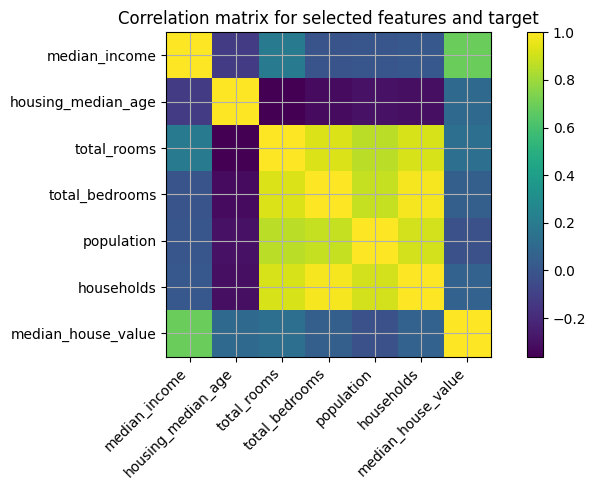

In [30]:
# Simple correlation matrix between selected features and the target
df = x[feature_cols].copy()
df[target_col] = y

corr_matrix = df.corr()
print("Correlation matrix: ")
display(corr_matrix)

# Plot correlation matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation matrix for selected features and target')
plt.tight_layout()
plt.show()

## Coding Multiple Linear Regression on Real Data

In this section we implement a full workflow for multiple linear regression:

1. Split the data into training and test sets
2. Fit a `LinearRegression` model on the training data
3. Inspect the learned coefficients and intercept
4. Make predictions on train and test sets
5. Evaluate the model using MAE, RMSE, and R squared
6. Visualize predicted vs actual values
7. Plot residuals to check basic patterns

We will use the feature matrix `X` and target `y` defined in Section 1.

In [31]:
# Handling missing values by mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(
    imputer.fit_transform(x),
    columns=x.columns
)

In [32]:
# step-1 Train test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state= 42)

print("Train set size ", X_train.shape[0] , "rows")
print("Test set size ", X_test.shape[0], "rows")


Train set size  16512 rows
Test set size  4128 rows


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       16512 non-null  float64
 1   housing_median_age  16512 non-null  float64
 2   total_rooms         16512 non-null  float64
 3   total_bedrooms      16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
dtypes: float64(6)
memory usage: 903.0 KB


In [34]:
# Create and fit the linear model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
# step 3- check learned parameters (coefficients and intercept)
print("Intercept (bias term): ", lin_reg.intercept_)
print("\nCoefficients: ")
for feature_name, coef in zip(feature_cols, lin_reg.coef_):
  print(f'{feature_name}: {coef}')

Intercept (bias term):  -47897.58543803284

Coefficients: 
median_income: 47958.90837012089
housing_median_age: 1896.9982439037046
total_rooms: -20.00281939466663
total_bedrooms: 101.94212151933456
population: -35.651793418820716
households: 127.0299556702677


In [36]:
# Step 4: Make predictions on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print("Some sample predictions on test set (first 5 rows): ")
print("Predicted: ", y_test_pred[:5])
print("Actual: ", y_test.values[:5])

Some sample predictions on test set (first 5 rows): 
Predicted:  [100859.76709752 144764.5517973  271494.98514251 255417.00090576
 219523.28998766]
Actual:  [ 47700  45800 500001 218600 278000]


In [37]:
# step 5 - Defining a function for evaluation matrix

def regression_metrics(y_true, y_pred, label='Model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'**** {label} ****')
  print('MAE: ', mae)
  print('RMSE: ', rmse)
  print('R2 : ', r2)
  print()

# Evaluate on train and test
regression_metrics(y_train, y_train_pred, label='Linear Regression (Train)')
regression_metrics(y_test, y_test_pred, label='Linear Regression (Test)')

# Here after evaluating we can see it's not working properly. Because Linear rigression dosen't work on complex relationship.

**** Linear Regression (Train) ****
MAE:  55685.39494849517
RMSE:  75809.31407227743
R2 :  0.5700818543102878

**** Linear Regression (Test) ****
MAE:  56739.98501933231
RMSE:  77226.78589410307
R2 :  0.544876709594915



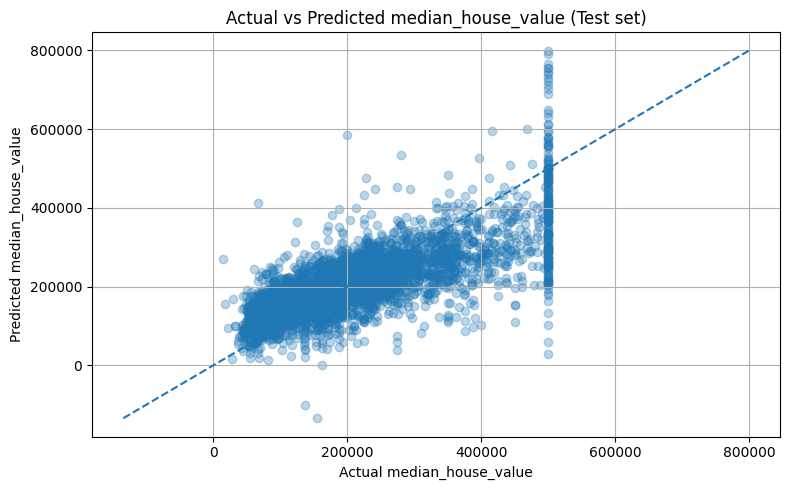

In [38]:
# Step 6: Plot predicted vs actual values on the test set

plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual median_house_value')
plt.ylabel('Predicted median_house_value')
plt.title('Actual vs Predicted median_house_value (Test set)')

# Diagonal reference line
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.tight_layout()
plt.show()

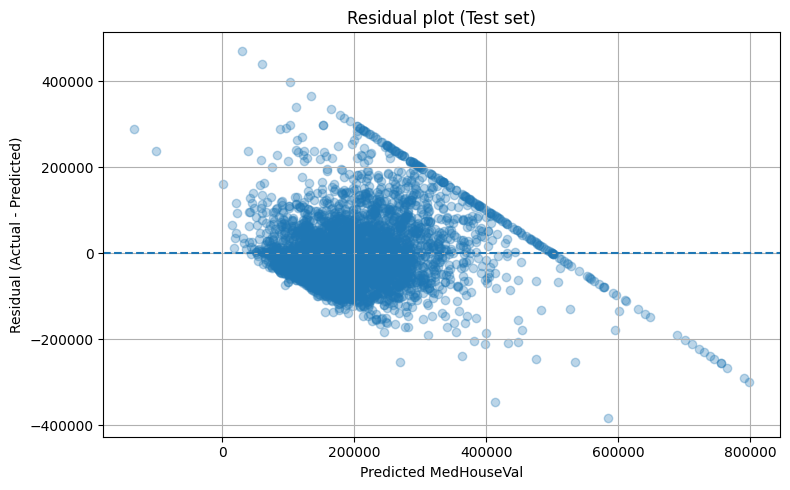

In [39]:
# Step 7- Residual plot (errors = actual - predicted)
"""
if,
  residuals = 0, perfect prediction
  residuals < 0, predicted too high
  residuals > 0, predicted too low
"""
residuals = y_test - y_test_pred

plt.figure()
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted MedHouseVal')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual plot (Test set)')
plt.tight_layout()
plt.show()

## Introduction to Polynomial Regression

Polynomial regression keeps the model **linear in parameters** but allows nonlinear relationships between the input feature and the target by adding polynomial terms.

Here in this part we:
- Use a **single feature** `median_income` (median income) to predict `median_house_value`
- Fit a simple **linear model** on this single feature
- Visualize the linear fit

Later, in next Section, we will extend this to polynomial regression using `PolynomialFeatures` and `Pipeline`.

In [40]:
# Prepare a single feature for illustration: median_income vs median_house_value
X_single = df[['median_income']]
y_single = df[target_col]

X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_single, y_single,
                                                                                test_size= 0.2, random_state=42)

print('Single feature training shape:', X_single_train.shape)
print('Single feature test shape    :', X_single_test.shape)

Single feature training shape: (16512, 1)
Single feature test shape    : (4128, 1)


In [41]:
# Fit a simple Linear Regression model using only median_income

lin_reg_single = LinearRegression()
lin_reg_single.fit(X_single_train, y_single_train)
y_single_test_pred = lin_reg_single.predict(X_single_test)

regression_metrics(y_single_test, y_single_test_pred, label='Single Feature Linear Regression (Test)')

**** Single Feature Linear Regression (Test) ****
MAE:  62990.86530093761
RMSE:  84209.01241414454
R2 :  0.45885918903846656



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


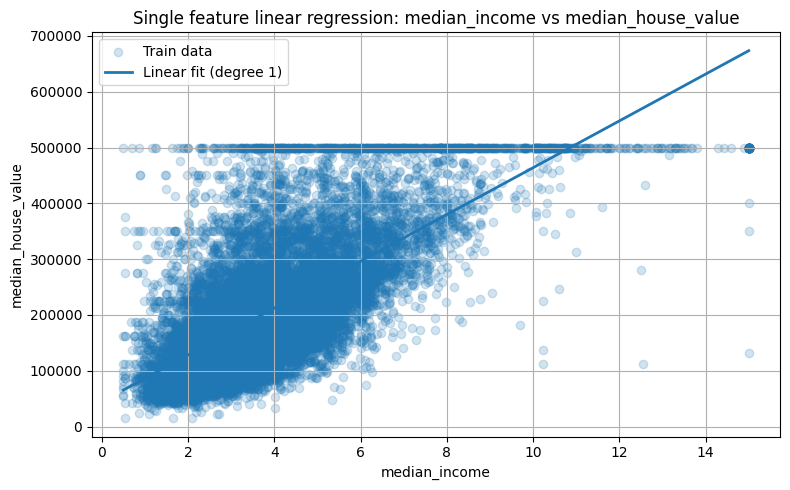

In [42]:
# Visualize the linear fit for the single feature model

# Create a grid of MedInc values for a smooth line
X_plot = np.linspace(X_single['median_income'].min(), X_single['median_income'].max(), 200).reshape(-1, 1)

y_plot_lin = lin_reg_single.predict(X_plot)

plt.figure()
plt.scatter(X_single_train['median_income'], y_single_train, alpha=0.2, label='Train data')
plt.plot(X_plot, y_plot_lin, linewidth=2, label='Linear fit (degree 1)')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Single feature linear regression: median_income vs median_house_value')
plt.legend()
plt.tight_layout()
plt.show()

## Coding Polynomial Regression on Real Data

In this section we:

- Use the same single feature `median_income`
- Create polynomial features of different degrees (1, 2, 3, and 5)
- Fit a linear regression model on these expanded features using `Pipeline`
- Compare performance (R squared and RMSE) for each degree

Key new tools:
- `PolynomialFeatures`: expands original features into polynomial combinations
- `Pipeline`: chains polynomial expansion and linear regression into one convenient object

In [43]:
# Compare polynomial regression models of different degrees on the single feature median_income

degrees = [1, 2, 3, 4, 5]
results = []

for deg in degrees:
  model = Pipeline([
      ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
      ('lin_reg', LinearRegression())
  ])

  model.fit(X_single_train, y_single_train)

  y_train_pred_deg = model.predict(X_single_train)
  y_test_pred_deg = model.predict(X_single_test)

  mae_train = mean_absolute_error(y_single_train, y_train_pred_deg)
  rmse_train = np.sqrt(mean_squared_error(y_single_train, y_train_pred_deg))
  r2_train = r2_score(y_single_train, y_train_pred_deg)

  mae_test = mean_absolute_error(y_single_test, y_test_pred_deg)
  rmse_test = np.sqrt(mean_squared_error(y_single_test, y_test_pred_deg))
  r2_test = r2_score(y_single_test, y_test_pred_deg)

  results.append({
      'degree': deg,
      'MAE_train': mae_train,
      'RMSE_train': rmse_train,
      'R2_train': r2_train,
      'MAE_test': mae_test,
      'RMSE_test': rmse_test,
      'R2_test': r2_test,
  })

results_df = pd.DataFrame(results)
results_df

,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,62495.076557,83614.874097,0.476993,62990.865301,84209.012414,0.458859
1,2,62404.930868,83245.948713,0.481598,62829.155887,83861.389691,0.463318
2,3,61500.992616,82503.304221,0.490806,62189.632170,83564.135519,0.467116
3,4,61513.167348,82494.956312,0.490909,62188.912252,83552.632777,0.467262
4,5,61441.077142,82484.431542,0.491039,62136.935976,83589.224337,0.466796


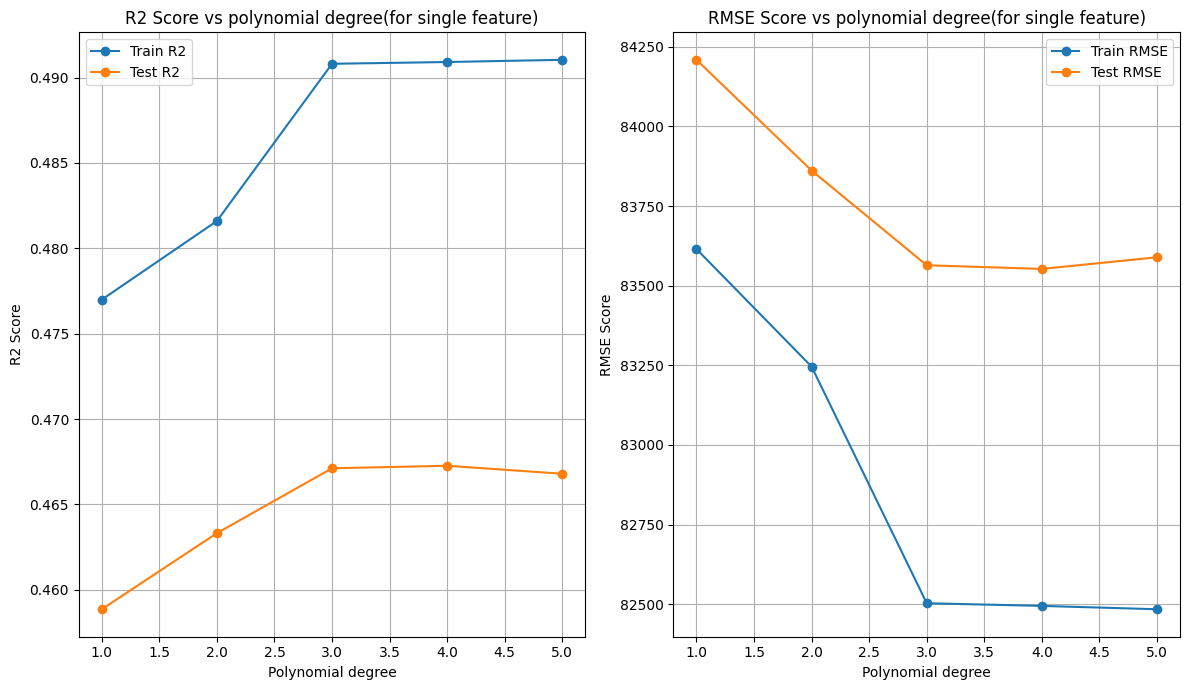

In [44]:
# Plot R squared and RMSE vs polynomial degree
fig, axes = plt.subplots(1,2, figsize=(12,7))


# R squared plot
axes[0].plot(results_df['degree'], results_df['R2_train'],marker='o',label='Train R2')
axes[0].plot(results_df['degree'], results_df['R2_test'],marker='o',label='Test R2')
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree(for single feature)")
axes[0].legend()

# RMSE plot
axes[1].plot(results_df['degree'], results_df['RMSE_train'],marker='o',label='Train RMSE')
axes[1].plot(results_df['degree'], results_df['RMSE_test'],marker='o',label='Test RMSE')
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree(for single feature)")
axes[1].legend()

plt.tight_layout()
plt.show()

### Polynomial Regression with Two Features

The main ideas can also extend to more than one feature. As an optional extension, we can use two features
`MedInc` and `HouseAge` together with polynomial degree 2.

In [46]:
# Optional block: polynomial regression with two features (degree 2)

feature_cols_two = ['median_income', 'housing_median_age']
X_two = df[feature_cols_two]

X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    X_two, y, test_size=0.2, random_state=42
)

deg = 2

poly_model_two = Pipeline([
    ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_model_two.fit(X_two_train, y_two_train)

y_two_test_pred = poly_model_two.predict(X_two_test)

regression_metrics(y_two_test, y_two_test_pred,
                   label='Polynomial regression (degree 2, two features)')

**** Polynomial regression (degree 2, two features) ****
MAE:  60130.643941428716
RMSE:  80620.3871690102
R2 :  0.5039986038552433



In [57]:
# All features
X_all = X.drop(columns=['ocean_proximity'])
y = y

# Handling missing values by mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_all_imputed = pd.DataFrame(
    imputer.fit_transform(X_all),
    columns=X_all.columns
)

# Train-test split
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all_imputed, y, test_size=0.2, random_state=42
)

# Polynomial Regression (degree 2) with all features
degree = 2

poly_all_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_all_model.fit(X_all_train, y_all_train)

y_all_test_pred = poly_all_model.predict(X_all_test)

# Evaluation
regression_metrics(y_all_test, y_all_test_pred,
                   label='Polynomial Regression (degree 2, ALL features)')

**** Polynomial Regression (degree 2, ALL features) ****
MAE:  47429.98092942262
RMSE:  67657.12225893226
R2 :  0.6506826289831324

